#CONJUNTO DE DATOS OBESIDAD

Este conjunto de datos incluye información para la estimación de los niveles de obesidad en individuos de los países de México, Perú y Colombia, con base en sus hábitos alimenticios y condición física. El 23% de los datos fueron recolectados directamente de los usuarios a través de una encuesta realizada por Fabio Mendoza Palechor y Alexis de la Hoz Manotas en una plataforma web y el 77% de los datos fueron generados sintéticamente utilizando la herramienta Weka y el filtro SMOTE.

Los datos contienen 19 atributos y 2111 registros:

*   Género: 1 hombre, 0 mujer.
*   La edad: en años.
*   Historia_familiar_con_sobrepeso: 1 tiene un miembro de la familia que tenga o tenía sobrepeso, 0 en caso contrario.
*   FAVC: 1 come alimentos hipercalóricos con frecuencia, 0 no.
*   FCVC: 1 suele comer verduras en sus comidas, 0 no.
*   NCP: representa cuántas comidas principales realiza el encuestado al día
    *   0 para 1-2 comidas.
    *   1 para 3 comidas.
    *   2 para más de 3 comidas.

*   CAEC: cuánta comida ingiere el encuestado entre comidas en una escala de 0 a 3.
*   FUMAR: 1 si fuma, 0 no fuma.
*   CH2O: cantidad de agua que bebe en una escala de 0 a 2.
*   SCC: 1 controla su ingesta calórica, 0 no lo hace.
*   FAF: cuánta actividad física realiza en una escala de 0 a 3.
*   TUE: representa cuánto tiempo pasa mirando dispositivos con pantallas en una escala de 0 a 2.
*   CALC: frecuencia con la que bebe alcohol en una escala de 0 a 3.
*   Automóvil, Bicicleta, Motocicleta, Transporte_público y Caminar indican el principal modo de transporte de la persona. Su principal modo de transporte se indica con un 1 y las demás columnas contendrán un 0.
*   NObeyesdad: 1 el paciente es obeso y un 0 si no lo es.

##Importamos las librerias

In [ ]:
#Procesamiento
import pandas as pd
import numpy as np
import os
import datetime as dt

#Manejo de valores núlos
import missingno as msno

#Visualización
import matplotlib.pyplot as plt
import seaborn as sns

#Machinelearning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Cargamod el conjunto de datos desde el drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Cargamos el path del los archivos en la variable ruta
ruta = '/content/drive/MyDrive/AnalisisDatos'
#Listamos los archivos que tenemos en la carpeta files
os.listdir(ruta)

['files',
 'Carpeta sin título',
 'ViolenciaIntrafamiliar.csv',
 'raw_data.csv',
 'ViolenciaIntrafamiliar.ipynb',
 'obesity.csv',
 'Ventas.ipynb',
 'Obesity.ipynb']

##Inspeccionamos el conjunto de datos.

In [ ]:
df = pd.read_csv(ruta+'/obesity.csv')
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


In [ ]:
df.shape

(2111, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   int64  
 1   Age                             2111 non-null   float64
 2   family_history_with_overweight  2111 non-null   int64  
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   CAEC                            2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   SCC                             2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  CALC                            21

In [ ]:
df.columns

Index(['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC',
       'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC',
       'Automobile', 'Bike', 'Motorbike', 'Public_Transportation', 'Walking',
       'NObeyesdad'],
      dtype='object')

#1.   LIMPIAR EL CONJUNTO DE DATOS

##1.1.  Valores nulos.

In [ ]:
df.isna().sum()

Gender                            0
Age                               0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
Automobile                        0
Bike                              0
Motorbike                         0
Public_Transportation             0
Walking                           0
NObeyesdad                        0
dtype: int64

##1.2.  Registros duplicados.

In [ ]:
df[df.duplicated()]

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
47,1,21.0,1,1,1.0,3.0,2,0,3.0,0,2.0,0.0,1,0,0,0,1,0,0
98,0,21.0,0,0,3.0,1.0,2,0,1.0,0,0.0,0.0,1,0,0,0,1,0,0
106,0,25.0,0,1,2.0,1.0,1,0,2.0,0,2.0,0.0,1,0,0,0,1,0,0
118,1,23.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,1,0,0,0,1,0,0
174,1,21.0,0,1,2.0,1.0,0,0,3.0,0,1.0,0.0,1,0,0,0,1,0,0
179,1,21.0,0,1,2.0,1.0,0,0,3.0,0,1.0,0.0,1,0,0,0,1,0,0
184,1,21.0,0,1,2.0,1.0,0,0,3.0,0,1.0,0.0,1,0,0,0,1,0,0
209,0,22.0,1,1,2.0,3.0,1,0,2.0,0,1.0,1.0,1,0,0,0,1,0,0
309,0,16.0,0,0,2.0,1.0,1,0,1.0,0,0.0,1.0,0,0,0,0,0,1,0
421,1,18.0,1,1,3.0,4.0,1,0,2.0,1,2.0,0.0,1,1,0,0,0,0,0


In [ ]:
df.duplicated().sum()

29

Porcentaje de filas duplicadas.

In [ ]:
porcentaje_duplicados = df.duplicated().sum() * 100 / df.shape[0]
print(f'El porcentaje de datos duplicados es {porcentaje_duplicados:.2f} %')

El porcentaje de datos duplicados es 1.37 %


Como es un porcentaje tan bajo de registros duplicados los podemos borrar.

##1.3.  Borramos registros duplicados.

In [ ]:
df.drop_duplicates(keep=False,inplace=True)

In [ ]:
df.duplicated().sum()

0

##1.4.  Cambiamos los valores de float a int

Debido a que los valores de las encuestas se realizarón con enteros.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2068 non-null   int64  
 1   Age                             2068 non-null   float64
 2   family_history_with_overweight  2068 non-null   int64  
 3   FAVC                            2068 non-null   int64  
 4   FCVC                            2068 non-null   float64
 5   NCP                             2068 non-null   float64
 6   CAEC                            2068 non-null   int64  
 7   SMOKE                           2068 non-null   int64  
 8   CH2O                            2068 non-null   float64
 9   SCC                             2068 non-null   int64  
 10  FAF                             2068 non-null   float64
 11  TUE                             2068 non-null   float64
 12  CALC                            2068 no

In [ ]:
df['Age'] = df['Age'].astype(int)
df['FCVC'] = df['FCVC'].astype(int)
df['NCP'] = df['NCP'].astype(int)
df['CH2O'] = df['CH2O'].astype(int)
df['FAF'] = df['FAF'].astype(int)
df['TUE'] = df['TUE'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2068 entries, 0 to 2110
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Gender                          2068 non-null   int64
 1   Age                             2068 non-null   int64
 2   family_history_with_overweight  2068 non-null   int64
 3   FAVC                            2068 non-null   int64
 4   FCVC                            2068 non-null   int64
 5   NCP                             2068 non-null   int64
 6   CAEC                            2068 non-null   int64
 7   SMOKE                           2068 non-null   int64
 8   CH2O                            2068 non-null   int64
 9   SCC                             2068 non-null   int64
 10  FAF                             2068 non-null   int64
 11  TUE                             2068 non-null   int64
 12  CALC                            2068 non-null   int64
 13  Automobi

##1.5.  Valores únicos de cada columna

In [ ]:
df.nunique()

Gender                             2
Age                               40
family_history_with_overweight     2
FAVC                               2
FCVC                               3
NCP                                4
CAEC                               4
SMOKE                              2
CH2O                               3
SCC                                2
FAF                                4
TUE                                3
CALC                               4
Automobile                         2
Bike                               2
Motorbike                          2
Public_Transportation              2
Walking                            2
NObeyesdad                         2
dtype: int64

##1.6.  Variables numéricas

In [ ]:
def estadicticos_cont(num):
    #calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #lo retornamos
    return (estadisticos)

In [ ]:
estadicticos_cont(df.select_dtypes('number'))

,count,mean,std,min,25%,50%,75%,max,median
Gender,2068.0,0.502418,0.500115,0.0,0.0,1.0,1.0,1.0,1.0
Age,2068.0,24.044971,6.347493,14.0,19.0,22.0,26.0,61.0,22.0
family_history_with_overweight,2068.0,0.825919,0.379271,0.0,1.0,1.0,1.0,1.0,1.0
FAVC,2068.0,0.884429,0.319787,0.0,1.0,1.0,1.0,1.0,1.0
FCVC,2068.0,2.212766,0.600912,1.0,2.0,2.0,3.0,3.0,2.0
NCP,2068.0,2.535783,0.818376,1.0,2.0,3.0,3.0,4.0,3.0
CAEC,2068.0,1.144101,0.457723,0.0,1.0,1.0,1.0,3.0,1.0
SMOKE,2068.0,0.021277,0.144340,0.0,0.0,0.0,0.0,1.0,0.0
CH2O,2068.0,1.704062,0.590559,1.0,1.0,2.0,2.0,3.0,2.0
SCC,2068.0,0.045455,0.208349,0.0,0.0,0.0,0.0,1.0,0.0


#2. Analisis exploratorio del Conjunto de Datos de Obesidad

##2.1   Contamos la cantidad de personas obesas

In [27]:
cantidad_obesos = df['NObeyesdad'].value_counts()
cantidad_obesos

NObeyesdad
0    1096
1     972
Name: count, dtype: int64

In [34]:
#Se puede graficar con este código
#fig, ax = plt.subplots(figsize=(8, 4))
#sns.countplot(x=df["NObeyesdad"], palette="magma")
#plt.show()

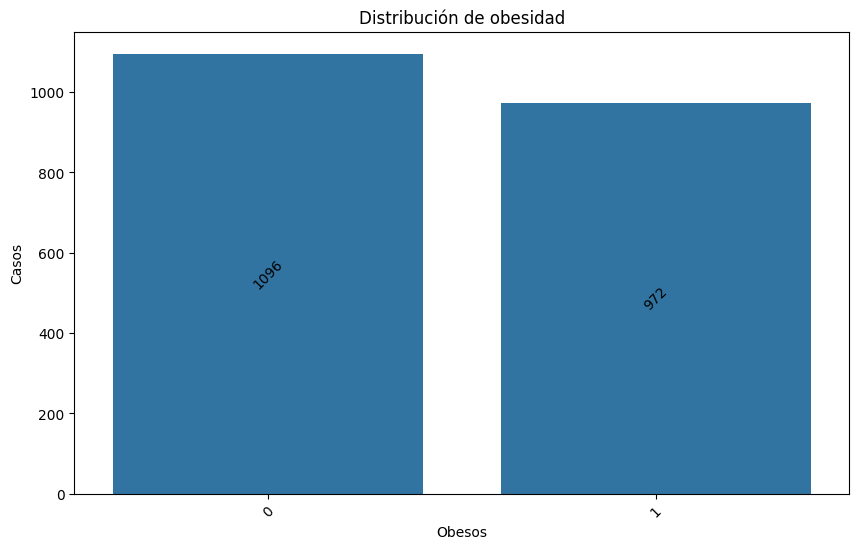

In [29]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=cantidad_obesos.index, y=cantidad_obesos.values)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=45)
plt.title("Distribución de obesidad")
plt.xlabel("Obesos")
plt.ylabel("Casos")
plt.show()

##2.2.  Cantidad de obesos por edad

In [32]:
gender_obesos = df['Gender'].value_counts()
gender_obesos

Gender
1    1039
0    1029
Name: count, dtype: int64

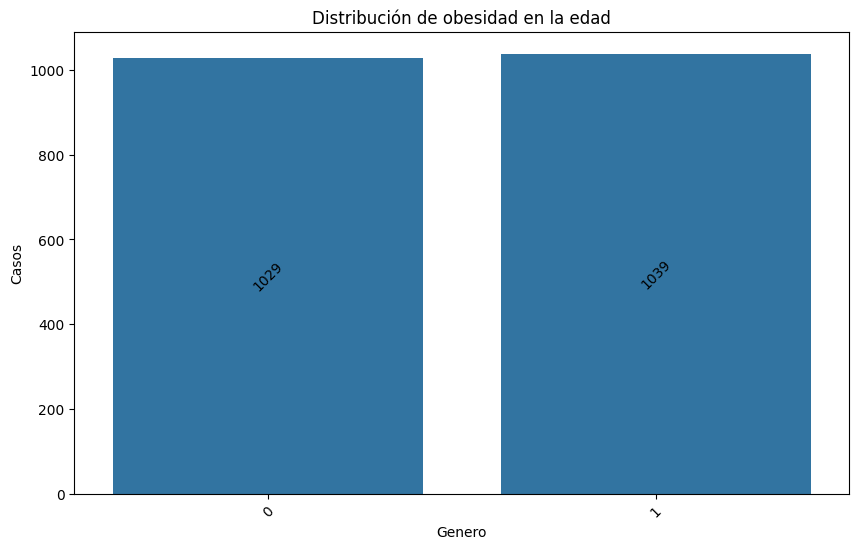

In [39]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=gender_obesos.index, y=gender_obesos.values)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=45)
plt.title("Distribución de obesidad en la edad")
plt.xlabel("Genero")
plt.ylabel("Casos")
plt.show()

##2.3.  Historial de Obesidad.

In [35]:
family_history = df['family_history_with_overweight'].value_counts()
family_history

family_history_with_overweight
1    1708
0     360
Name: count, dtype: int64

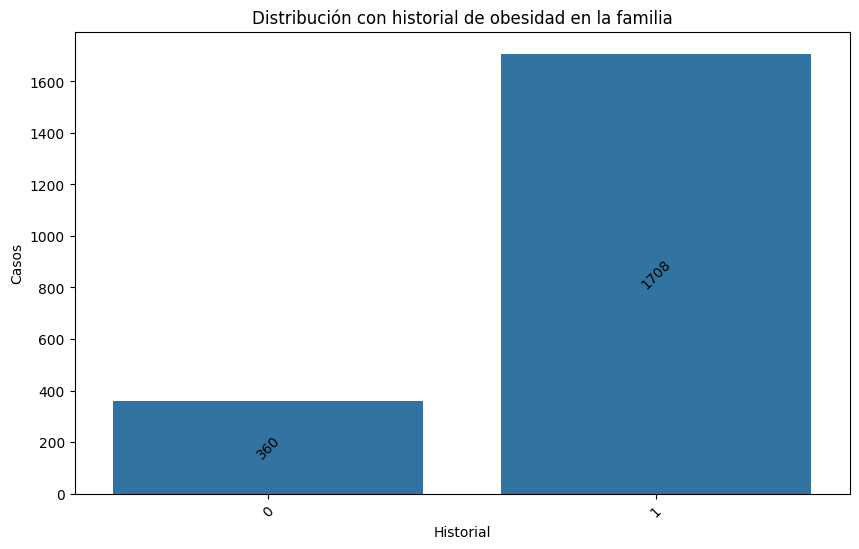

In [40]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=family_history.index, y=family_history.values)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=45)
plt.title("Distribución con historial de obesidad en la familia")
plt.xlabel("Historial")
plt.ylabel("Casos")
plt.show()

##2.4.  CAEC
*   (cuánta comida ingiere el encuestado entre comidas en una escala de 0 a 3.)

In [38]:
caec_obesity = df['CAEC'].value_counts()
caec_obesity

CAEC
1    1751
2     228
3      53
0      36
Name: count, dtype: int64

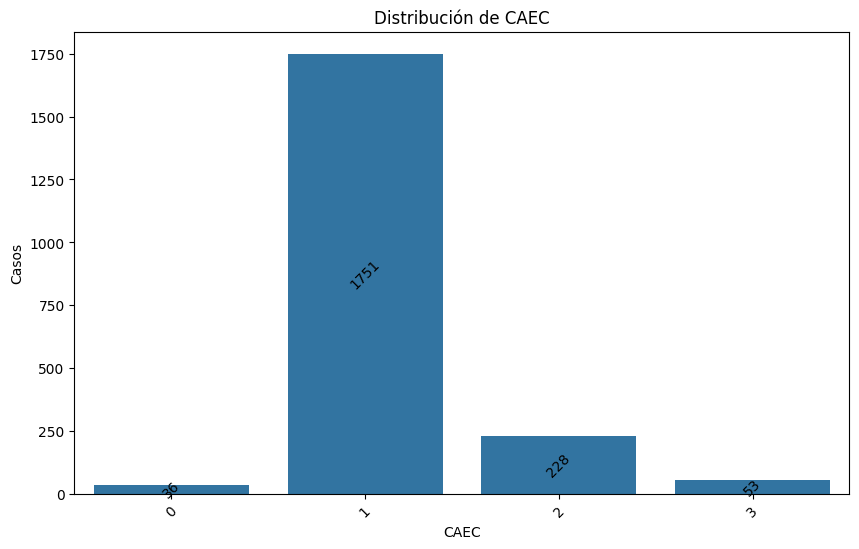

In [41]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=caec_obesity.index, y=caec_obesity.values)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=45)
plt.title("Distribución de CAEC")
plt.xlabel("CAEC")
plt.ylabel("Casos")
plt.show()

##2.5.  Edad

In [42]:
edad_obesity = df['Age'].value_counts()
edad_obesity

Age
21    248
18    230
19    184
23    161
25    157
22    157
26    139
20    137
24     84
17     82
30     65
31     46
29     43
33     36
37     33
27     31
38     31
34     28
16     27
28     22
40     22
39     20
32     18
36     12
35     12
41     11
43      7
55      5
42      5
45      4
47      2
56      1
51      1
44      1
14      1
15      1
50      1
52      1
46      1
61      1
Name: count, dtype: int64

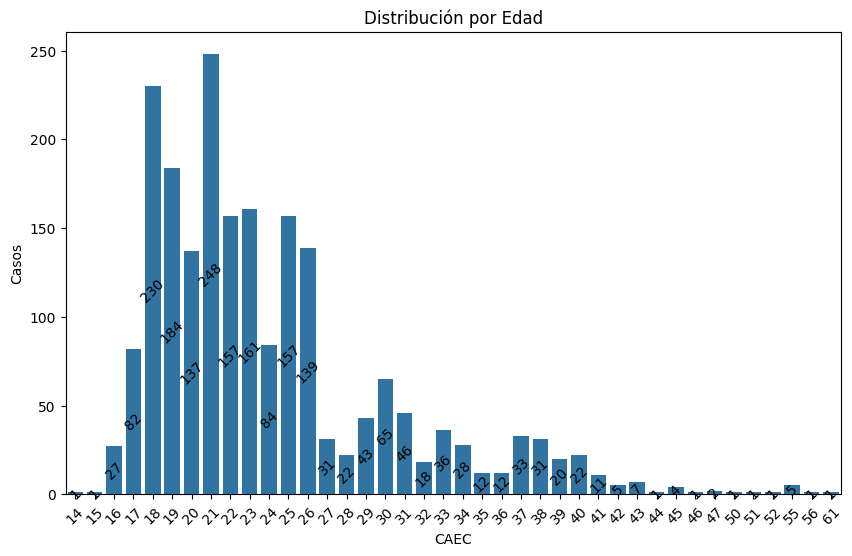

In [52]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=edad_obesity.index, y=edad_obesity.values)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='center', rotation=45)
plt.xticks(rotation=45)
plt.title("Distribución por Edad")
plt.xlabel("CAEC")
plt.ylabel("Casos")
plt.show()

##2.6.  Matriz de correlación entre las variables

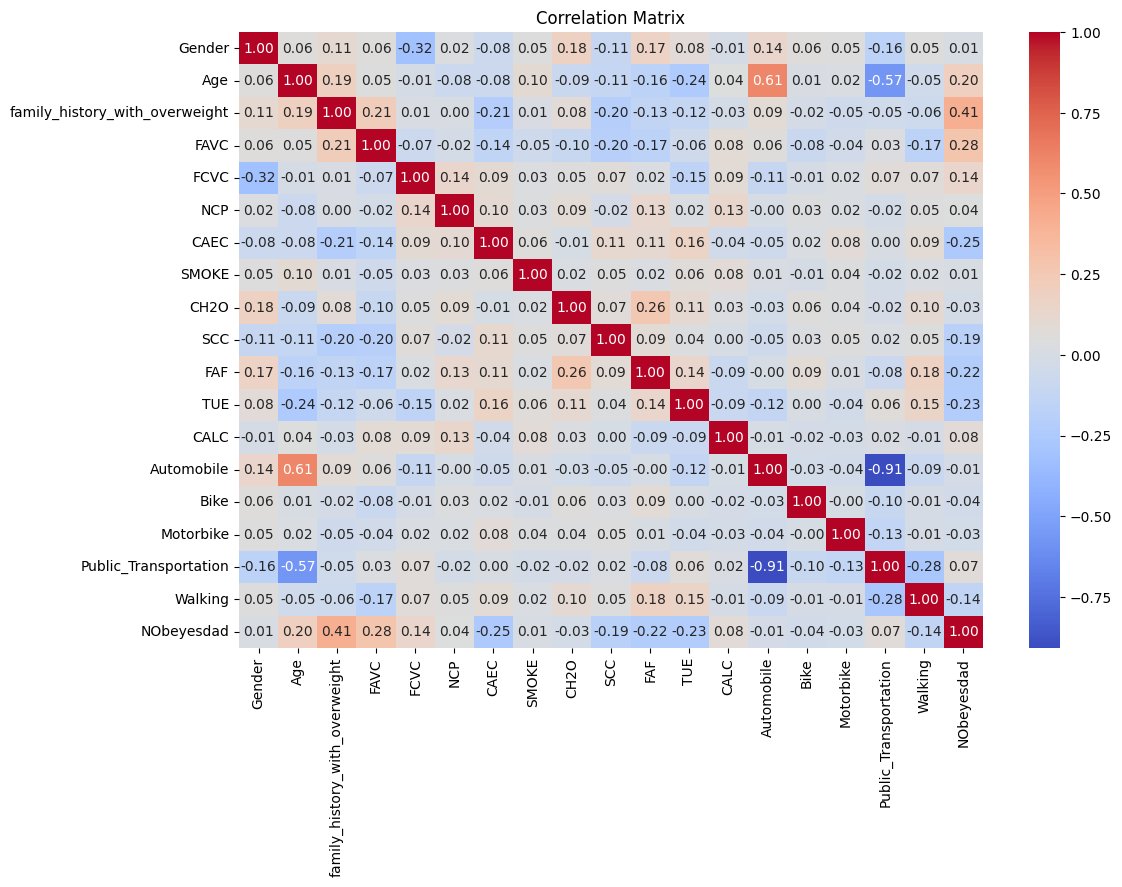

In [50]:
# Visualize the correlation matrix for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

##2.7.  Correlación con respecto a la obesidad

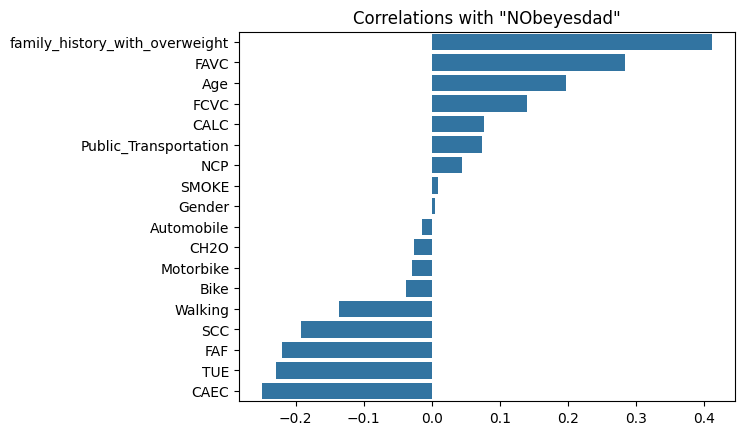

In [51]:
limit = -1.0

data = df.corr()["NObeyesdad"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    if data[indices[i]]>limit:
        labels.append(indices[i])
        corr.append(data[i])
sns.barplot(x=corr, y=labels)
plt.title('Correlations with "NObeyesdad"')
plt.show()